In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,classification_report
from sklearn.tree import DecisionTreeClassifier


In [109]:
#load the data
df = pd.read_csv('heart.csv',sep=',', encoding="UTF-8")

In [110]:
#take a look at the first five line by default
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [111]:
#take a look at the last five line by default
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [112]:
#Check the data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [113]:
#Check information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [114]:
#Show Describe about our data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [115]:
#Check how many rows and columns are there for all data
#first one is rows, other is columns
df.shape

(303, 14)

In [116]:
#Check how many missing data is in our data

#df.isnull().sum()
print(pd.isnull(df).sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [117]:
#Check all rows control for null values
df.isnull().values.any()

False

In [118]:
#Check the name of our columns
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [119]:
#Check how many we have disease & haven't
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [120]:
#count the nbr of people that have disease & haven't
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print(countNoDisease)
print(countHaveDisease)

138
165


In [121]:
#the percentage of patients that have disease & haven't
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


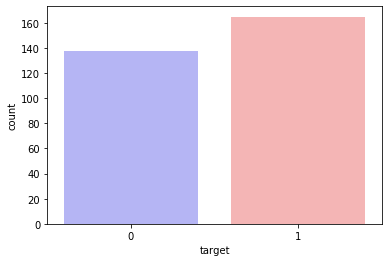

In [122]:
#graphic show the result of people that have disese & haven't
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [123]:
#the percentage of patients of each gender
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


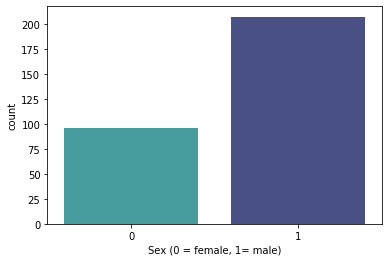

In [124]:
#graphic represent the nbr of patients of each gender 
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [125]:
#the average of patients that have and haven't disese compared to each columns
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


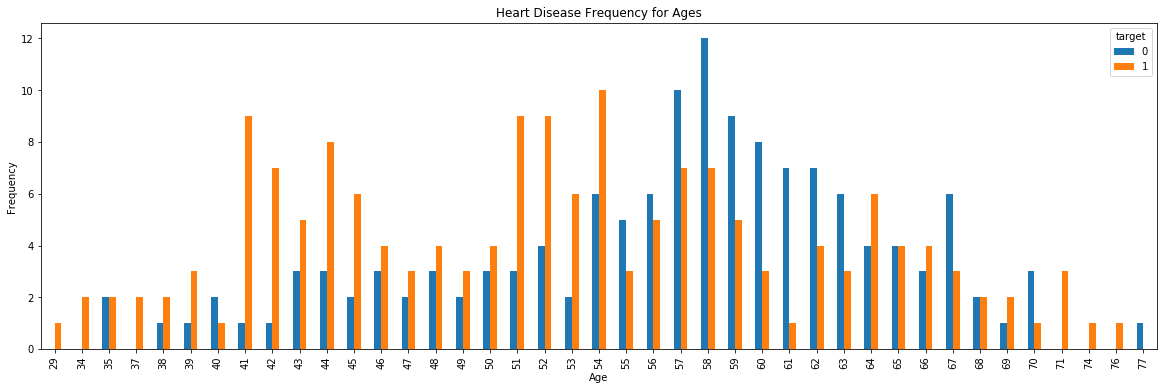

In [126]:
#graphic that represent the relationship between age and the possibility of having a heart disease

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

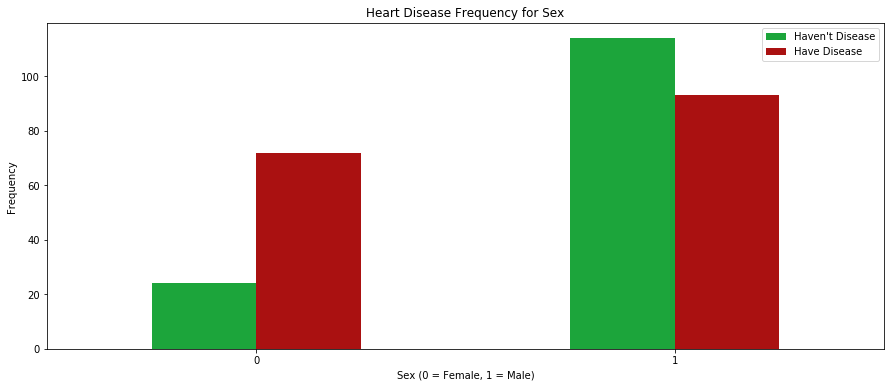

In [127]:
#graphic that represent the relationship between sex and the possibility of having a heart disease

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

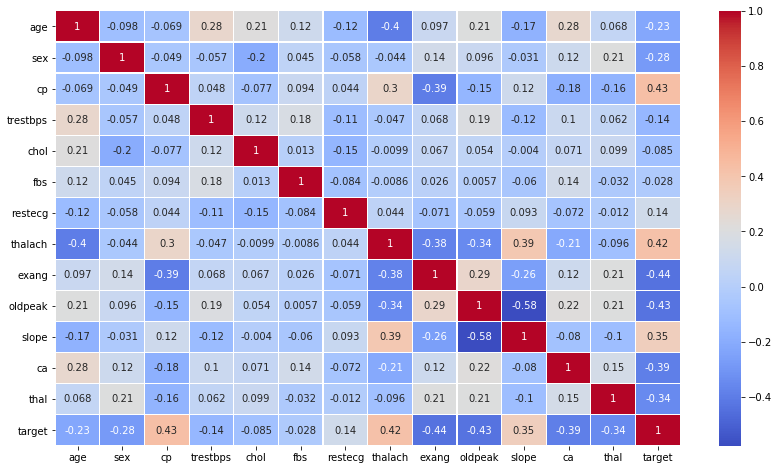

In [128]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [129]:
X= df.drop('target',axis=1)
y=df['target']

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [131]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [132]:

knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [133]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [134]:
model.fit(X_train,y_train)
model.best_params_           #print's parameters best values

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

In [135]:
predict = model.predict(X_test)

In [136]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8131868131868132
Using k-NN we get an accuracy score of:  81.319 %


In [137]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[32,  9],
       [ 8, 42]], dtype=int64)

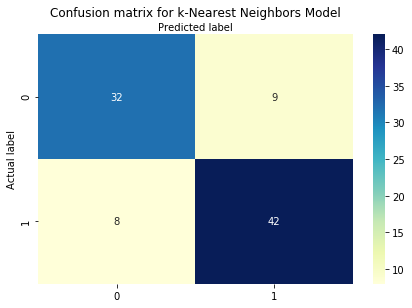

In [138]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [139]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [140]:
y_probabilities = model.predict_proba(X_test)[:,1]

In [141]:
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

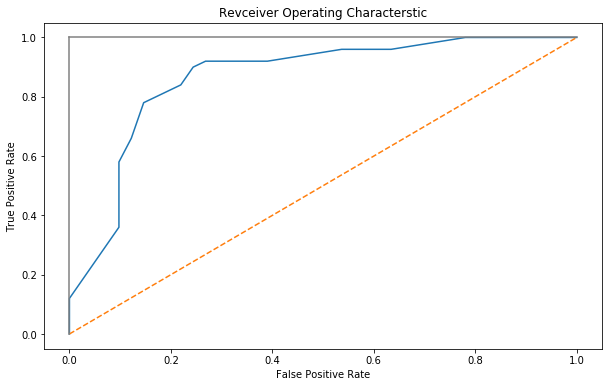

In [142]:
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [143]:
roc_auc_score(y_test,y_probabilities)

0.8651219512195122

In [144]:
log = LogisticRegression()

In [145]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [146]:
log_model.fit(X_train,y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

C:\Users\merye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\merye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\merye\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\merye\anaconda3\lib\site-packages\

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [147]:
predict = log_model.predict(X_test)

In [148]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8241758241758241
Using Logistic Regression we get an accuracy score of:  82.418 %


In [150]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [151]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[33,  8],
       [ 8, 42]], dtype=int64)

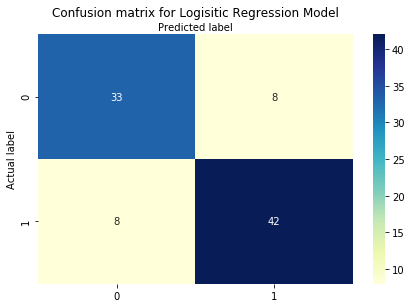

In [152]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [153]:
target_probailities_log = log_model.predict_proba(X_test)[:,1]

In [154]:
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

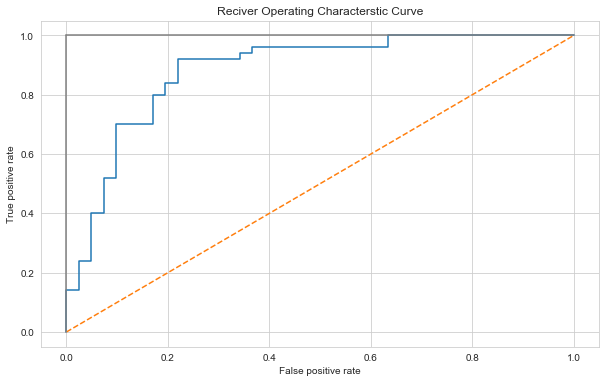

In [155]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [156]:
roc_auc_score(y_test,target_probailities_log)

0.8814634146341463

In [157]:
dtree= DecisionTreeClassifier(random_state=7)

In [158]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [159]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}

In [160]:
predict = tree_model.predict(X_test)

In [161]:
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7252747252747253
Using Decision Tree we get an accuracy score of:  72.527 %


In [162]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        41
           1       0.78      0.70      0.74        50

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



In [163]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[31, 10],
       [15, 35]], dtype=int64)

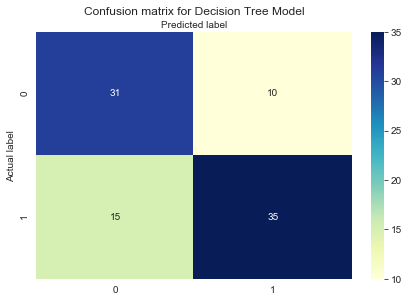

In [164]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [165]:
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [166]:
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

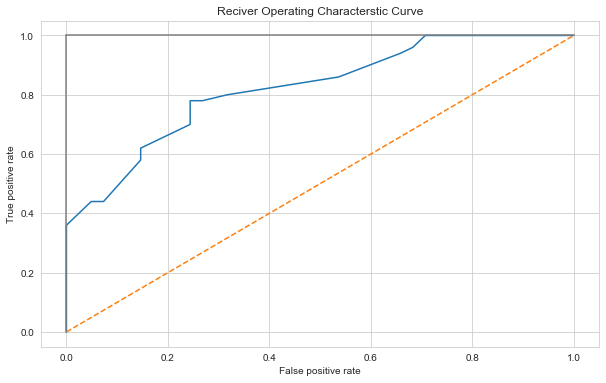

In [167]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [168]:
roc_auc_score(y_test,target_probailities_tree)

0.8212195121951219

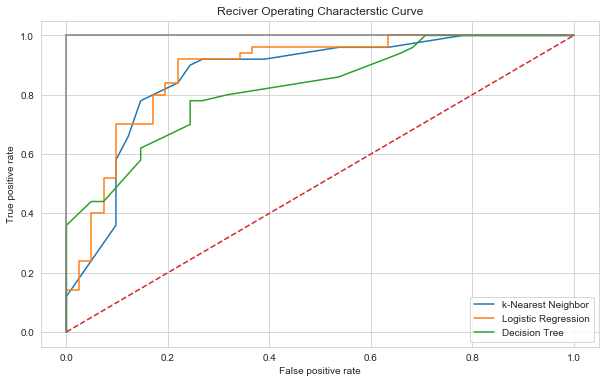

In [169]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()